<h1><center>CSEN1022:Assignment 2</center></h1>
<h3><center>Winter 2021</center></h3>
<hr style="border:2px solid black"> </hr>

## <u> Please don't forget to fill in this data </u>
**Member 1**

Name:Noureldin Ayman Ghazal

GUC-ID:43-15747

Elective Tutorial No.:T07

**Member 2**

Name:Mohamed Ahmed Mohamed Alekhsasy

GUC-ID:43-16620

Elective Tutorial No.:T03

<hr style="border:2px solid black"> </hr>

## Imports (Don't Edit)

In [45]:
# ONLY USE THESE IMPORTS.
# PLEASE DON'T EDIT THIS CELL.
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
confusion_matrices_nb = []
confusion_matrices_gm = []

## Read Data

In [46]:
# X_train, X_test
# import os 


train_plane = np.array([plt.imread('Data/train/airplane/'+str(i)+'.jpg').reshape(-1) for i in range (5000)],dtype = float)
test_plane = np.array([plt.imread('Data/test/airplane/'+str(i)+'.jpg').reshape(-1) for i in range (1000)],dtype = float)
train_car = np.array([plt.imread('Data/train/automobile/'+str(i)+'.jpg').reshape(-1) for i in range (5000)],dtype = float)
test_car = np.array([plt.imread('Data/test/automobile/'+str(i)+'.jpg').reshape(-1) for i in range (1000)],dtype = float)
train_frog = np.array([plt.imread('Data/train/frog/'+str(i)+'.jpg').reshape(-1) for i in range (5000)],dtype = float)
test_frog = np.array([plt.imread('Data/test/frog/'+str(i)+'.jpg').reshape(-1) for i in range (1000)],dtype = float)

train_plane.shape
# return (x_train, y_train), (x_test, y_test)

(5000, 3072)

In [47]:
# train_plane.astype(float)
for i,sample in enumerate(train_plane):
    m= (np.max(sample) - np.min(sample))
    min = np.min(sample)
#     train_plane[i].astype(float)
#     print(type(train_plane[i]))
#     print(sample)
    for j, pixle in enumerate(sample):
        x = pixle /255
#         print(x)
        train_plane[i][j]=x
    
#########################################################################################################
# train_car.astype(float)
for i,sample in enumerate(train_car):
    m= (np.max(sample) - np.min(sample))
    min = np.min(sample)
#     train_car[i].astype(float)
#     print(type(train_plane[i]))
#     print(sample)
    for j, pixle in enumerate(sample):
        x = pixle /255
#         print(x)
        train_car[i][j]=x

    
# #########################################################################################################
    
# train_frog.astype(float)
for i,sample in enumerate(train_frog):
    m= (np.max(sample) - np.min(sample))
    min = np.min(sample)
#     train_frog[i].astype(float)
#     print(type(train_plane[i]))
#     print(sample)
    for j, pixle in enumerate(sample):
        x = pixle /255
#         print(x)
        train_frog[i][j]=x  

In [48]:
for i,sample in enumerate(test_plane):
    m= (np.max(sample) - np.min(sample))
    min = np.min(sample)
#     train_frog[i].astype(float)
#     print(type(train_plane[i]))
#     print(sample)
    for j, pixle in enumerate(sample):
        x = pixle /255
#         print(x)
        test_plane[i][j]=x

    
for i,sample in enumerate(test_car):
    m= (np.max(sample) - np.min(sample))
    min = np.min(sample)
#     train_frog[i].astype(float)
#     print(type(train_plane[i]))
#     print(sample)
    for j, pixle in enumerate(sample):
        x = pixle /255
#         print(x)
        test_car[i][j]=x
    
    
for i,sample in enumerate(test_frog):
    m= (np.max(sample) - np.min(sample))
    min = np.min(sample)
#     train_frog[i].astype(float)
#     print(type(train_plane[i]))
#     print(sample)
    for j, pixle in enumerate(sample):
        x = pixle /255
#         print(x)
        test_frog[i][j]=x

In [49]:
train_plane

array([[0.78431373, 0.79215686, 0.77254902, ..., 0.9254902 , 0.9254902 ,
        0.93333333],
       [0.47058824, 0.45882353, 0.42352941, ..., 0.4627451 , 0.43137255,
        0.34117647],
       [1.        , 0.95686275, 0.98431373, ..., 0.41960784, 0.4745098 ,
        0.02745098],
       ...,
       [0.72941176, 0.71764706, 0.68235294, ..., 0.58823529, 0.49019608,
        0.32941176],
       [0.59215686, 0.60784314, 0.61176471, ..., 0.51372549, 0.46666667,
        0.27058824],
       [0.60784314, 0.62745098, 0.63921569, ..., 0.60784314, 0.63137255,
        0.63137255]])

<hr style="border:2px solid black"> </hr>

## Construct Naive Bayes classifier for each of the 3 classes.
#### Test each classifier on all images in X_Test. 
#### Construct Confusion Matrix.

In [50]:
# def Gauss(x,m,v):
#     f = (np.exp((((x-m)**2)*(-1))/2*v)/np.sqrt(2*np.pi*v))
# #     print(m , " // " , v , " // " , f)
# #     return f

In [51]:
def func(pixel,mean,var):
    PI=22/7
    e = 2.718281828459045
    first=1/(2*PI*var)**.5
    second=e**((-(pixel-mean)**2)/(2*var))
    return first*second

In [52]:
def confusionMatrixFunc(ArrayProbabitis):
    confusion_matrix=[]
    countAirplane=0
    countAutombile=0
    countfrog=0

    for i in range(1000):
        if ArrayProbabitis[i]==0:
            countAirplane+=1
        if ArrayProbabitis[i]==1:
            countAutombile+=1
        if ArrayProbabitis[i]==2:
            countfrog+=1
    temp=[countAirplane,countAutombile,countfrog]
    confusion_matrix+=[temp]

    countAirplane=0
    countAutombile=0
    countfrog=0
    
    for i in range(1000,2000):
        if ArrayProbabitis[i]==0:
            countAirplane+=1
        if ArrayProbabitis[i]==1:
            countAutombile+=1
        if ArrayProbabitis[i]==2:
            countfrog+=1
    temp=[countAirplane,countAutombile,countfrog]
    confusion_matrix+=[temp]


    countAirplane=0
    countAutombile=0
    countfrog=0

    for i in range(2000,3000):
        if ArrayProbabitis[i]==0:
            countAirplane+=1
        if ArrayProbabitis[i]==1:
            countAutombile+=1
        if ArrayProbabitis[i]==2:
            countfrog+=1
    temp=[countAirplane,countAutombile,countfrog]
    confusion_matrix+=[temp]
    confusion_matrix=np.array(confusion_matrix)
    return confusion_matrix

In [53]:
# ===================================================================================================
#                                     For the Plane
# ===================================================================================================
mPlane = train_plane.mean(axis = 0)
vPlane = train_plane.var(axis = 0)

test_total = np.concatenate((test_plane , test_car , test_frog) , axis=0)
print(test_total.shape)
pPlane = np.zeros(3000)

for i in range(3000):
    pPlane_x = np.zeros(3072)
    for c in range(3072):
        pPlane_x[c] = func(test_total[i][c] ,mPlane[c],vPlane[c])
    
    pPlane[i] = np.prod(pPlane_x)
print(pPlane.shape)
print("Plane has been trained Successfully !!")

# ===================================================================================================
#                                     For the Car
# ===================================================================================================
mCar = train_car.mean(axis = 0)
vCar = train_car.var(axis = 0)
pCar = np.zeros(3000)
for i in range(3000):
    pCar_x = np.zeros(3072)
    for c in range(3072):
        pCar_x[c] = func(test_total[i][c] ,mCar[c],vCar[c])
    pCar[i] = np.prod(pCar_x)
print(pCar.shape)
print("Car has been trained Successfully !!")

# ===================================================================================================
#                                     For the Frog
# ===================================================================================================
mFrog = train_frog.mean(axis = 0)
vFrog = train_frog.var(axis = 0)
pFrog = np.zeros(3000)
for i in range(3000):
    pFrog_x = np.zeros(3072)
    for c in range(3072):
        pFrog_x[c] = func(test_total[i][c] ,mFrog[c],vFrog[c])
    pFrog[i] = np.prod(pFrog_x)
print(pFrog.shape)
print("Frog has been trained Successfully !!")

(3000, 3072)
(3000,)
Plane has been trained Successfully !!
(3000,)
Car has been trained Successfully !!
(3000,)
Frog has been trained Successfully !!


In [54]:
t=np.concatenate((pPlane.reshape(-1,1),pCar.reshape(-1,1)),axis=1)
t=np.concatenate((t,pFrog.reshape(-1,1)),axis=1)
print(t.shape)
t=np.argmax(t,axis=1)
t.shape
confusion_matrix1=confusionMatrixFunc(t)
confusion_matrix1

(3000, 3)


array([[767, 132, 101],
       [328, 392, 280],
       [240, 135, 625]])

In [55]:
confusion_matrices_nb += [confusion_matrix1]

In [56]:
train_plane16=np.array([cv2.resize(x.reshape(32,32,3), (16, 16),interpolation = cv2.INTER_AREA) for x in train_plane])
train_car16=np.array([cv2.resize(x.reshape(32,32,3), (16, 16),interpolation = cv2.INTER_AREA) for x in train_car])
train_frog16=np.array([cv2.resize(x.reshape(32,32,3), (16, 16),interpolation = cv2.INTER_AREA) for x in train_frog])
test_plane16=np.array([cv2.resize(x.reshape(32,32,3), (16, 16),interpolation = cv2.INTER_AREA) for x in test_plane])
test_car16 =np.array([cv2.resize(x.reshape(32,32,3), (16, 16),interpolation = cv2.INTER_AREA) for x in test_car])
test_frog16 =np.array([cv2.resize(x.reshape(32,32,3), (16, 16),interpolation = cv2.INTER_AREA) for x in test_frog])

train_plane16=train_plane16.reshape(5000,768)
train_car16=train_car16.reshape(5000,768)
train_frog16=train_frog16.reshape(5000,768)
test_plane16=test_plane16.reshape(1000,768)
test_car16=test_car16.reshape(1000,768)
test_frog16=test_frog16.reshape(1000,768)

In [57]:
# train_plane16 = np.array([np.resize(plt.imread('Data/train/airplane/'+str(i)+'.jpg'),(16,16,3)).reshape(-1) for i in range (5000)],dtype = float)
# test_plane16 = np.array([np.resize(plt.imread('Data/test/airplane/'+str(i)+'.jpg'),(16,16,3)).reshape(-1) for i in range (1000)],dtype = float)
# train_car16 = np.array([np.resize(plt.imread('Data/train/automobile/'+str(i)+'.jpg'),(16,16,3)).reshape(-1) for i in range (5000)],dtype = float)
# test_car16 = np.array([np.resize(plt.imread('Data/test/automobile/'+str(i)+'.jpg'),(16,16,3)).reshape(-1) for i in range (1000)],dtype = float)
# train_frog16 = np.array([np.resize(plt.imread('Data/train/frog/'+str(i)+'.jpg'),(16,16,3)).reshape(-1) for i in range (5000)],dtype = float)
# test_frog16 = np.array([np.resize(plt.imread('Data/test/frog/'+str(i)+'.jpg'),(16,16,3)).reshape(-1) for i in range (1000)],dtype = float)
# train_plane16.shape

In [58]:
# # train_plane16.astype(float)
# for i,sample in enumerate(train_plane16):
#     m= (np.max(sample) - np.min(sample))
#    # train_plane16.astype(float)
# for i,sample in enumerate(train_plane16):
#     m= (np.max(sample) - np.min(sample))
    
#    train_car16[i][j]=x

    
# # #########################################################################################################
    
# # train_frog16.astype(float)
# for i,sample in enumerate(train_frog16):
#     m= (np.max(sample) - np.min(sample))
#     min = np.min(sample)
# #     train_frog16[i].astype(float)
# #     print(type(train_plane16[i]))
# #     print(sample)
#     for j, pixle in enumerate(sample):
#         x = pixle /255
# #         print(x)
#         train_frog16[i][j]=x

# for i,sample in enumerate(test_plane16):
#     m= (np.max(sample) - np.min(sample))
#     min = np.min(sample)
# #     train_frog16[i].astype(float)
# #     print(type(train_plane16[i]))
# #     print(sample)
#     for j, pixle in enumerate(sample):
#         x = pixle /255
# #         print(x)
#         test_plane16[i][j]=x

    
# for i,sample in enumerate(test_car16):
#     m= (np.max(sample) - np.min(sample))
#     min = np.min(sample)
# #     train_frog16[i].astype(float)
# #     print(type(train_plane16[i]))
# #     print(sample)
#     for j, pixle in enumerate(sample):
#         x = pixle /255
# #         print(x)
#         test_car16[i][j]=x
    
    
# for i,sample in enumerate(test_frog16):
#     m= (np.max(sample) - np.min(sample))
#     min = np.min(sample)
# #     train_frog16[i].astype(float)
# #     print(type(train_plane16[i]))
# #     print(sample)
#     for j, pixle in enumerate(sample):
#         x = pixle /255
# #         print(x)
#         test_frog16[i][j]=x min = np.min(sample)
# #     train_plane16[i].astype(float)
# #     print(type(train_plane16[i]))
# #     print(sample)
#     for j, pixle in enumerate(sample):
#         x = pixle /255
# #         print(x)
#         train_plane16[i][j]=x
    
# ######### train_plane16.astype(float)
# for i,sample in enumerate(train_plane16):
#     m= (np.max(sample) - np.min(sample))
    
#    train_car16[i][j]=x

    
# # #########################################################################################################
    
# # train_frog16.astype(float)
# for i,sample in enumerate(train_frog16):
#     m= (np.max(sample) - np.min(sample))
#     min = np.min(sample)
# #     train_frog16[i].astype(float)
# #     print(type(train_plane16[i]))
# #     print(sample)
#     for j, pixle in enumerate(sample):
#         x = pixle /255
# #         print(x)
#         train_frog16[i][j]=x

# for i,sample in enumerate(test_plane16):
#     m= (np.max(sample) - np.min(sample))
#     min = np.min(sample)
# #     train_frog16[i].astype(float)
# #     print(type(train_plane16[i]))
# #     print(sample)
#     for j, pixle in enumerate(sample):
#         x = pixle /255
# #         print(x)
#         test_plane16[i][j]=x

    
# for i,sample in enumerate(test_car16):
#     m= (np.max(sample) - np.min(sample))
#     min = np.min(sample)
# #     train_frog16[i].astype(float)
# #     print(type(train_plane16[i]))
#     print(sample)
#     for j, pixle in enumerate(sample):
#         x = pixle /255
# #         print(x)
#         test_car16[i][j]=x
    
    
# for i,sample in enumerate(test_frog16):
#     m= (np.max(sample) - np.min(sample))
#     min = np.min(sample)
# #     train_frog16[i].astype(float)
# #     print(type(train_plane16[i]))
# #     print(sample)
#     for j, pixle in enumerate(sample):
#         x = pixle /255
# #         print(x)
#         test_frog16[i][j]=x#################################################################################################
# # train_car16.astype(float)
# for i,sample in enumerate(train_car16):
#     m= (np.max(sample) - np.min(sample))
#     min = np.min(sample)
# #     train_car16[i].astype(float)
# #     print(type(train_plane16[i]))
# #     print(sample)
#     for j, pixle in enumerate(sample):
#         x = pixle /255
# #         print(x)
#         train_car16[i][j]=x

    
# # #########################################################################################################
    
# # train_frog16.astype(float)
# for i,sample in enumerate(train_frog16):
#     m= (np.max(sample) - np.min(sample))
#     min = np.min(sample)
# #     train_frog16[i].astype(float)
# #     print(type(train_plane16[i]))
# #     print(sample)
#     for j, pixle in enumerate(sample):
#         x = pixle /255
# #         print(x)
#         train_frog16[i][j]=x

# for i,sample in enumerate(test_plane16):
#     m= (np.max(sample) - np.min(sample))
#     min = np.min(sample)
# #     train_frog16[i].astype(float)
# #     print(type(train_plane16[i]))
# #     print(sample)
#     for j, pixle in enumerate(sample):
#         x = pixle /255
# #         print(x)
#         test_plane16[i][j]=x

    
# for i,sample in enumerate(test_car16):
#     m= (np.max(sample) - np.min(sample))
#     min = np.min(sample)
# #     train_frog16[i].astype(float)
# #     print(type(train_plane16[i]))
# #     print(sample)
#     for j, pixle in enumerate(sample):
#         x = pixle /255
# #         print(x)
#         test_car16[i][j]=x
    
    
# # for i,sample in enumerate(test_frog16):
# #     m= (np.max(sample) - np.min(sample))
# #     min = np.min(sample)
# #     train_frog16[i].astype(float)
# #     print(type(train_plane16[i]))
# #     print(sample)
#     for j, pixle in enumerate(sample):
#         x = pixle /255
# #         print(x)
#         test_frog16[i][j]=x
# ========================================================================

# ===================================================================================================
#                                     For the Plane
# ===================================================================================================
mPlane16 = train_plane16.mean(axis = 0)
vPlane16 = train_plane16.var(axis = 0)

test_total16 = np.concatenate((test_plane16 , test_car16 , test_frog16) , axis=0)
print(test_total16.shape)
pPlane16 = np.zeros(3000)

for i in range(3000):
    pPlane_x16 = np.zeros(768)
    for c in range(768):
        pPlane_x16[c] = func(test_total16[i][c] ,mPlane16[c],vPlane16[c])
    pPlane16[i] = np.prod(pPlane_x16)
print(pPlane16.shape)
print("Plane has been trained Successfully !!")

# ===================================================================================================
#                                     For the Car
# ===================================================================================================
mCar16 = train_car16.mean(axis = 0)
vCar16 = train_car16.var(axis = 0)
pCar16 = np.zeros(3000)
for i in range(3000):
    pCar_x16 = np.zeros(768)
    for c in range(768):
        pCar_x16[c] = func(test_total16[i][c] ,mCar16[c],vCar16[c])
    pCar16[i] = np.prod(pCar_x16)
print(pCar16.shape)
print("Car has been trained Successfully !!")

# ===================================================================================================
#                                     For the Frog
# ===================================================================================================
mFrog16 = train_frog16.mean(axis = 0)
vFrog16 = train_frog16.var(axis = 0)
pFrog16 = np.zeros(3000)
for i in range(3000):
    pFrog_x16 = np.zeros(768)
    for c in range(768):
        pFrog_x16[c] = func(test_total16[i][c] ,mFrog16[c],vFrog16[c])
    pFrog16[i] = np.prod(pFrog_x16)
print(pFrog16.shape)
print("Frog has been trained Successfully !!")

# ==============================================================

t=np.concatenate((pPlane16.reshape(-1,1),pCar16.reshape(-1,1)),axis=1)
t=np.concatenate((t,pFrog16.reshape(-1,1)),axis=1)
print(t.shape)
t=np.argmax(t,axis=1)
t.shape
confusion_matrix2=confusionMatrixFunc(t)
print(confusion_matrix2)

(3000, 768)
(3000,)
Plane has been trained Successfully !!
(3000,)
Car has been trained Successfully !!
(3000,)
Frog has been trained Successfully !!
(3000, 3)
[[725 129 146]
 [255 432 313]
 [170  53 777]]


In [59]:
confusion_matrices_nb += [confusion_matrix2]

In [60]:
# train_plane8 = np.array([np.resize(plt.imread('Data/train/airplane/'+str(i)+'.jpg'),(8,8,3)).reshape(-1) for i in range (5000)],dtype = float)
# test_plane8 = np.array([np.resize(plt.imread('Data/test/airplane/'+str(i)+'.jpg'),(8,8,3)).reshape(-1) for i in range (1000)],dtype = float)
# train_car8 = np.array([np.resize(plt.imread('Data/train/automobile/'+str(i)+'.jpg'),(8,8,3)).reshape(-1) for i in range (5000)],dtype = float)
# test_car8 = np.array([np.resize(plt.imread('Data/test/automobile/'+str(i)+'.jpg'),(8,8,3)).reshape(-1) for i in range (1000)],dtype = float)
# train_frog8 = np.array([np.resize(plt.imread('Data/train/frog/'+str(i)+'.jpg'),(8,8,3)).reshape(-1) for i in range (5000)],dtype = float)
# test_frog8 = np.array([np.resize(plt.imread('Data/test/frog/'+str(i)+'.jpg'),(8,8,3)).reshape(-1) for i in range (1000)],dtype = float)
# train_plane8.shape

train_plane8=np.array([cv2.resize(x.reshape(32,32,3), (8,8),interpolation = cv2.INTER_AREA) for x in train_plane])
train_car8=np.array([cv2.resize(x.reshape(32,32,3), (8, 8),interpolation = cv2.INTER_AREA) for x in train_car])
train_frog8=np.array([cv2.resize(x.reshape(32,32,3), (8, 8),interpolation = cv2.INTER_AREA) for x in train_frog])
test_plane8=np.array([cv2.resize(x.reshape(32,32,3), (8, 8),interpolation = cv2.INTER_AREA) for x in test_plane])
test_car8 =np.array([cv2.resize(x.reshape(32,32,3), (8, 8),interpolation = cv2.INTER_AREA) for x in test_car])
test_frog8 =np.array([cv2.resize(x.reshape(32,32,3), (8, 8),interpolation = cv2.INTER_AREA) for x in test_frog])

train_plane8=train_plane8.reshape(5000,192)
train_car8=train_car8.reshape(5000,192)
train_frog8=train_frog8.reshape(5000,192)
test_plane8=test_plane8.reshape(1000,192)
test_car8=test_car8.reshape(1000,192)
test_frog8=test_frog8.reshape(1000,192)

In [61]:
# # train_plane8.astype(float)
# for i,sample in enumerate(train_plane8):
#     m= (np.max(sample) - np.min(sample))
#     min = np.min(sample)
# #     train_plane8[i].astype(float)
# #     print(type(train_plane8[i]))
# #     print(sample)
#     for j, pixle in enumerate(sample):
#         x = pixle /255
# #         print(x)
#         train_plane8[i][j]=x
    
# #########################################################################################################
# # train_car8.astype(float)
# for i,sample in enumerate(train_car8):
#     m= (np.max(sample) - np.min(sample))
#     min = np.min(sample)
# #     train_car8[i].astype(float)
# #     print(type(train_plane8[i]))
# #     print(sample)
#     for j, pixle in enumerate(sample):
#         x = pixle /255
# #         print(x)
#         train_car8[i][j]=x

    
# # #########################################################################################################
    
# # train_frog8.astype(float)
# for i,sample in enumerate(train_frog8):
#     m= (np.max(sample) - np.min(sample))
#     min = np.min(sample)
# #     train_frog8[i].astype(float)
# #     print(type(train_plane8[i]))
# #     print(sample)
#     for j, pixle in enumerate(sample):
#         x = pixle /255
# #         print(x)
#         train_frog8[i][j]=x

# for i,sample in enumerate(test_plane8):
#     m= (np.max(sample) - np.min(sample))
#     min = np.min(sample)
# #     train_frog8[i].astype(float)
# #     print(type(train_plane8[i]))
# #     print(sample)
#     for j, pixle in enumerate(sample):
#         x = pixle /255
# #         print(x)
#         test_plane8[i][j]=x

    
# for i,sample in enumerate(test_car8):
#     m= (np.max(sample) - np.min(sample))
#     min = np.min(sample)
# #     train_frog8[i].astype(float)
# #     print(type(train_plane8[i]))
# #     print(sample)
#     for j, pixle in enumerate(sample):
#         x = pixle /255
# #         print(x)
#         test_car8[i][j]=x
    
    
# for i,sample in enumerate(test_frog8):
#     m= (np.max(sample) - np.min(sample))
#     min = np.min(sample)
# #     train_frog8[i].astype(float)
# #     print(type(train_plane8[i]))
# #     print(sample)
#     for j, pixle in enumerate(sample):
#         x = pixle /255
# #         print(x)
#         test_frog8[i][j]=x
# ========================================================================

# ===================================================================================================
#                                     For the Plane
# ===================================================================================================
mPlane8 = train_plane8.mean(axis = 0)
vPlane8 = train_plane8.var(axis = 0)

test_total8 = np.concatenate((test_plane8 , test_car8 , test_frog8) , axis=0)
print(test_total8.shape)
pPlane8 = np.zeros(3000)

for i in range(3000):
    pPlane_x8 = np.zeros(192)
    for c in range(192):
        pPlane_x8[c] = func(test_total8[i][c] ,mPlane8[c],vPlane8[c])
    pPlane8[i] = np.prod(pPlane_x8)
print(pPlane8.shape)
print("Plane has been trained Successfully !!")

# ===================================================================================================
#                                     For the Car
# ===================================================================================================
mCar8 = train_car8.mean(axis = 0)
vCar8 = train_car8.var(axis = 0)
pCar8 = np.zeros(3000)
for i in range(3000):
    pCar_x8 = np.zeros(192)
    for c in range(192):
        pCar_x8[c] = func(test_total8[i][c] ,mCar8[c],vCar8[c])
    pCar8[i] = np.prod(pCar_x8)
print(pCar8.shape)
print("Car has been trained Successfully !!")

# ===================================================================================================
#                                     For the Frog
# ===================================================================================================
mFrog8 = train_frog8.mean(axis = 0)
vFrog8 = train_frog8.var(axis = 0)
pFrog8 = np.zeros(3000)
for i in range(3000):
    pFrog_x8 = np.zeros(192)
    for c in range(192):
        pFrog_x8[c] = func(test_total8[i][c] ,mFrog8[c],vFrog8[c])
    pFrog8[i] = np.prod(pFrog_x8)
print(pFrog8.shape)
print("Frog has been trained Successfully !!")

# ==============================================================

t=np.concatenate((pPlane8.reshape(-1,1),pCar8.reshape(-1,1)),axis=1)
t=np.concatenate((t,pFrog8.reshape(-1,1)),axis=1)
print(t.shape)
t=np.argmax(t,axis=1)
t.shape
confusion_matrix3=confusionMatrixFunc(t)
print(confusion_matrix3)

(3000, 192)
(3000,)
Plane has been trained Successfully !!
(3000,)
Car has been trained Successfully !!
(3000,)
Frog has been trained Successfully !!
(3000, 3)
[[712 147 141]
 [253 426 321]
 [166  56 778]]


In [62]:
confusion_matrices_nb += [confusion_matrix3]

In [63]:
# train_plane4 = np.array([np.resize(plt.imread('Data/train/airplane/'+str(i)+'.jpg'),(4,4,3)).reshape(-1) for i in range (5000)],dtype = float)
# test_plane4 = np.array([np.resize(plt.imread('Data/test/airplane/'+str(i)+'.jpg'),(4,4,3)).reshape(-1) for i in range (1000)],dtype = float)
# train_car4 = np.array([np.resize(plt.imread('Data/train/automobile/'+str(i)+'.jpg'),(4,4,3)).reshape(-1) for i in range (5000)],dtype = float)
# test_car4 = np.array([np.resize(plt.imread('Data/test/automobile/'+str(i)+'.jpg'),(4,4,3)).reshape(-1) for i in range (1000)],dtype = float)
# train_frog4 = np.array([np.resize(plt.imread('Data/train/frog/'+str(i)+'.jpg'),(4,4,3)).reshape(-1) for i in range (5000)],dtype = float)
# test_frog4 = np.array([np.resize(plt.imread('Data/test/frog/'+str(i)+'.jpg'),(4,4,3)).reshape(-1) for i in range (1000)],dtype = float)
# train_plane4.shape
train_plane4=np.array([cv2.resize(x.reshape(32,32,3), (4,4),interpolation = cv2.INTER_AREA) for x in train_plane])
train_car4=np.array([cv2.resize(x.reshape(32,32,3), (4,4),interpolation = cv2.INTER_AREA) for x in train_car])
train_frog4=np.array([cv2.resize(x.reshape(32,32,3), (4,4),interpolation = cv2.INTER_AREA) for x in train_frog])
test_plane4=np.array([cv2.resize(x.reshape(32,32,3), (4,4),interpolation = cv2.INTER_AREA) for x in test_plane])
test_car4 =np.array([cv2.resize(x.reshape(32,32,3), (4,4),interpolation = cv2.INTER_AREA) for x in test_car])
test_frog4 =np.array([cv2.resize(x.reshape(32,32,3), (4,4),interpolation = cv2.INTER_AREA) for x in test_frog])

train_plane4=train_plane4.reshape(5000,48)
train_car4=train_car4.reshape(5000,48)
train_frog4=train_frog4.reshape(5000,48)
test_plane4=test_plane4.reshape(1000,48)
test_car4=test_car4.reshape(1000,48)
test_frog4=test_frog4.reshape(1000,48)

In [64]:
# # train_plane4.astype(float)
# for i,sample in enumerate(train_plane4):
#     m= (np.max(sample) - np.min(sample))
#     min = np.min(sample)
# #     train_plane4[i].astype(float)
# #     print(type(train_plane4[i]))
# #     print(sample)
#     for j, pixle in enumerate(sample):
#         x = pixle /255
# #         print(x)
#         train_plane4[i][j]=x
    
# #########################################################################################################
# # train_car4.astype(float)
# for i,sample in enumerate(train_car4):
#     m= (np.max(sample) - np.min(sample))
#     min = np.min(sample)
# #     train_car4[i].astype(float)
# #     print(type(train_plane4[i]))
# #     print(sample)
#     for j, pixle in enumerate(sample):
#         x = pixle /255
# #         print(x)
#         train_car4[i][j]=x

    
# # #########################################################################################################
    
# # train_frog4.astype(float)
# for i,sample in enumerate(train_frog4):
#     m= (np.max(sample) - np.min(sample))
#     min = np.min(sample)
# #     train_frog4[i].astype(float)
# #     print(type(train_plane4[i]))
# #     print(sample)
#     for j, pixle in enumerate(sample):
#         x = pixle /255
# #         print(x)
#         train_frog4[i][j]=x

# for i,sample in enumerate(test_plane4):
#     m= (np.max(sample) - np.min(sample))
#     min = np.min(sample)
# #     train_frog4[i].astype(float)
# #     print(type(train_plane4[i]))
# #     print(sample)
#     for j, pixle in enumerate(sample):
#         x = pixle /255
# #         print(x)
#         test_plane4[i][j]=x

    
# for i,sample in enumerate(test_car4):
#     m= (np.max(sample) - np.min(sample))
#     min = np.min(sample)
# #     train_frog4[i].astype(float)
# #     print(type(train_plane4[i]))
# #     print(sample)
#     for j, pixle in enumerate(sample):
#         x = pixle /255
# #         print(x)
#         test_car4[i][j]=x
    
    
# for i,sample in enumerate(test_frog4):
#     m= (np.max(sample) - np.min(sample))
#     min = np.min(sample)
# #     train_frog4[i].astype(float)
# #     print(type(train_plane4[i]))
# #     print(sample)
#     for j, pixle in enumerate(sample):
#         x = pixle /255
# #         print(x)
#        test_frog4[i][j]=x
# ========================================================================

# ===================================================================================================
#                                     For the Plane
# ===================================================================================================
mPlane4 = train_plane4.mean(axis = 0)
vPlane4 = train_plane4.var(axis = 0)

test_total4 = np.concatenate((test_plane4 , test_car4 , test_frog4) , axis=0)
print(test_total4.shape)
pPlane4 = np.zeros(3000)

for i in range(3000):
    pPlane_x4 = np.zeros(48)
    for c in range(48):
        pPlane_x4[c] = func(test_total4[i][c] ,mPlane4[c],vPlane4[c])
    pPlane4[i] = np.prod(pPlane_x4)
print(pPlane4.shape)
print("Plane has been trained Successfully !!")

# ===================================================================================================
#                                     For the Car
# ===================================================================================================
mCar4 = train_car4.mean(axis = 0)
vCar4 = train_car4.var(axis = 0)
pCar4 = np.ones(3000)
for i in range(3000):
    pCar_x4 = np.ones(48)
    for c in range(48):
        pCar_x4[c] = func(test_total4[i][c] ,mCar4[c],vCar4[c])
    pCar4[i] = np.prod(pCar_x4)
print(pCar4.shape)
print("Car has been trained Successfully !!")

# ===================================================================================================
#                                     For the Frog
# ===================================================================================================
mFrog4 = train_frog4.mean(axis = 0)
vFrog4 = train_frog4.var(axis = 0)
pFrog4 = np.zeros(3000)
for i in range(3000):
    pFrog_x4 = np.zeros(48)
    for c in range(48):
        pFrog_x4[c] = func(test_total4[i][c] ,mFrog4[c],vFrog4[c])
    pFrog4[i] = np.prod(pFrog_x4)
print(pFrog4.shape)
print("Frog has been trained Successfully !!")

# ==============================================================

t=np.concatenate((pPlane4.reshape(-1,1),pCar4.reshape(-1,1)),axis=1)
t=np.concatenate((t,pFrog4.reshape(-1,1)),axis=1)
print(t.shape)
t=np.argmax(t,axis=1)
t.shape
confusion_matrix4=confusionMatrixFunc(t)
print(confusion_matrix4)

(3000, 48)
(3000,)
Plane has been trained Successfully !!
(3000,)
Car has been trained Successfully !!
(3000,)
Frog has been trained Successfully !!
(3000, 3)
[[681 182 137]
 [256 384 360]
 [164  61 775]]


In [65]:
confusion_matrices_nb += [confusion_matrix4]

<hr style="border:2px solid black"> </hr>

## Construct Gaussian Generative Model classifier for each of the 3 classes.
#### Test each classifier on all images in X_Test. 
#### Construct Confusion Matrix.

In [66]:
scatter_plane = (train_plane - mPlane).T @ (train_plane - mPlane)
scatter_car   = (train_car - mCar).T @ (train_car - mCar)
scatter_frog  = (train_frog - mFrog).T @ (train_frog - mFrog)
# sigma_formal  = (1/3) * (1/5000) * scatter_plane + (1/3) * (1/5000) * scatter_car + (1/3) * (1/5000) * scatter_frog
# print(sigma_formal)
# print("/////////")
sigma         = (scatter_plane+scatter_car+scatter_frog)*(1/3)
inverse_Sigma = np.linalg.inv(sigma)
# print(sigma)

# ===================================================================================================
#                                     For the Plane
# ===================================================================================================

plane = np.zeros(3000)
for i in range(3000):
    val = (test_total[i] - mPlane) @ inverse_Sigma @ (test_total[i] - mPlane).T
    plane[i] = np.exp(-0.5 * val)
    
print("Plane has been trained Successfully !!") 

# ===================================================================================================
#                                     For the Car
# ===================================================================================================

car = np.zeros(3000)
for i in range(3000):
    val = (test_total[i] - mCar) @ inverse_Sigma @ (test_total[i] - mCar).T
    car[i] = np.exp(-0.5 * val)
    
print("Car has been trained Successfully !!")

# ===================================================================================================
#                                     For the Frog
# ===================================================================================================

frog = np.zeros(3000)
for i in range(3000):
    val = (test_total[i] - mFrog) @ inverse_Sigma @ (test_total[i] - mFrog).T
    frog[i] = np.exp(-0.5 * val)
    
print("Frog has been trained Successfully !!")


t=np.concatenate((plane.reshape(-1,1),car.reshape(-1,1)),axis=1)
t=np.concatenate((t,frog.reshape(-1,1)),axis=1)
t=np.argmax(t,axis=1)
confusion_matrix5 = confusionMatrixFunc(t)
print(confusion_matrix5)


Plane has been trained Successfully !!
Car has been trained Successfully !!
Frog has been trained Successfully !!
[[763 147  90]
 [200 656 144]
 [ 76 141 783]]


In [67]:
confusion_matrices_gm=[]
confusion_matrices_gm += [confusion_matrix5]

In [68]:
scatter_plane16 = (train_plane16 - mPlane16).T @ (train_plane16 - mPlane16)
scatter_car16   = (train_car16 - mCar16).T @ (train_car16 - mCar16)
scatter_frog16  = (train_frog16 - mFrog16).T @ (train_frog16 - mFrog16)
# sigma_formal  = (1/3) * (1/5000) * scatter_plane16 + (1/3) * (1/5000) * scatter_car + (1/3) * (1/5000) * scatter_frog
# print(sigma_formal)
# print("/////////")
sigma16         = (scatter_plane16+scatter_car16+scatter_frog16)*(1/3)
inverse_Sigma16 = np.linalg.inv(sigma16)
# print(sigma)

# ===================================================================================================
#                                     For the plane16
# ===================================================================================================

plane16 = np.zeros(3000)
for i in range(3000):
    val16 = (test_total16[i] - mPlane16) @ inverse_Sigma16 @ (test_total16[i] - mPlane16).T
    plane16[i] = np.exp(-0.5 * val16)
    
print("plane16 has been trained Successfully !!") 

# ===================================================================================================
#                                     For the Car
# ===================================================================================================

car16 = np.zeros(3000)
for i in range(3000):
    val16 = (test_total16[i] - mCar16) @ inverse_Sigma16 @ (test_total16[i] - mCar16).T
    car16[i] = np.exp(-0.5 * val16)
    
print("Car has been trained Successfully !!")

# ===================================================================================================
#                                     For the Frog
# ===================================================================================================

frog16 = np.zeros(3000)
for i in range(3000):
    val16 = (test_total16[i] - mFrog16) @ inverse_Sigma16 @ (test_total16[i] - mFrog16).T
    frog16[i] = np.exp(-0.5 * val16)
    
print("Frog has been trained Successfully !!")


t=np.concatenate((plane16.reshape(-1,1),car16.reshape(-1,1)),axis=1)
t=np.concatenate((t,frog16.reshape(-1,1)),axis=1)
t=np.argmax(t,axis=1)
confusion_matrix6 = confusionMatrixFunc(t)
print(confusion_matrix6)


plane16 has been trained Successfully !!
Car has been trained Successfully !!
Frog has been trained Successfully !!
[[798 113  89]
 [161 716 123]
 [ 64 107 829]]


In [69]:
confusion_matrices_gm += [confusion_matrix6]

In [70]:
scatter_plane8 = (train_plane8 - mPlane8).T @ (train_plane8 - mPlane8)
scatter_car8   = (train_car8 - mCar8).T @ (train_car8 - mCar8)
scatter_frog8  = (train_frog8 - mFrog8).T @ (train_frog8 - mFrog8)
# sigma_formal  = (1/3) * (1/5000) * scatter_plane8 + (1/3) * (1/5000) * scatter_car + (1/3) * (1/5000) * scatter_frog
# print(sigma_formal)
# print("/////////")
sigma8         = (scatter_plane8+scatter_car8+scatter_frog8)*(1/3)
inverse_Sigma8 = np.linalg.inv(sigma8)
# print(sigma)

# ===================================================================================================
#                                     For the plane8
# ===================================================================================================

plane8 = np.zeros(3000)
for i in range(3000):
    val8 = (test_total8[i] - mPlane8) @ inverse_Sigma8 @ (test_total8[i] - mPlane8).T
    plane8[i] = np.exp(-0.5 * val8)
    
print("plane8 has been trained Successfully !!") 

# ===================================================================================================
#                                     For the Car
# ===================================================================================================

car8 = np.zeros(3000)
for i in range(3000):
    val8 = (test_total8[i] - mCar8) @ inverse_Sigma8 @ (test_total8[i] - mCar8).T
    car8[i] = np.exp(-0.5 * val8)
    
print("Car has been trained Successfully !!")

# ===================================================================================================
#                                     For the Frog
# ===================================================================================================

frog8 = np.zeros(3000)
for i in range(3000):
    val8 = (test_total8[i] - mFrog8) @ inverse_Sigma8 @ (test_total8[i] - mFrog8).T
    frog8[i] = np.exp(-0.5 * val8)
    
print("Frog has been trained Successfully !!")


t=np.concatenate((plane8.reshape(-1,1),car8.reshape(-1,1)),axis=1)
t=np.concatenate((t,frog8.reshape(-1,1)),axis=1)
t=np.argmax(t,axis=1)
confusion_matrix7 = confusionMatrixFunc(t)
print(confusion_matrix7)


plane8 has been trained Successfully !!
Car has been trained Successfully !!
Frog has been trained Successfully !!
[[789 127  84]
 [176 705 119]
 [ 57 103 840]]


In [71]:
confusion_matrices_gm += [confusion_matrix7]

In [72]:
scatter_plane4 = (train_plane4 - mPlane4).T @ (train_plane4 - mPlane4)
scatter_car4   = (train_car4 - mCar4).T @ (train_car4 - mCar4)
scatter_frog4  = (train_frog4 - mFrog4).T @ (train_frog4 - mFrog4)
# sigma_formal  = (1/3) * (1/5000) * scatter_plane4 + (1/3) * (1/5000) * scatter_car + (1/3) * (1/5000) * scatter_frog
# print(sigma_formal)
# print("/////////")
sigma4         = (scatter_plane4+scatter_car4+scatter_frog4)*(1/3)
inverse_Sigma4 = np.linalg.inv(sigma4)
# print(sigma)

# ===================================================================================================
#                                     For the plane4
# ===================================================================================================

plane4 = np.zeros(3000)
for i in range(3000):
    val4 = (test_total4[i] - mPlane4) @ inverse_Sigma4 @ (test_total4[i] - mPlane4).T
    plane4[i] = np.exp(-0.5 * val4)
    
print("plane4 has been trained Successfully !!") 

# ===================================================================================================
#                                     For the Car
# ===================================================================================================

car4 = np.zeros(3000)
for i in range(3000):
    val4 = (test_total4[i] - mCar4) @ inverse_Sigma4 @ (test_total4[i] - mCar4).T
    car4[i] = np.exp(-0.5 * val4)
    
print("Car has been trained Successfully !!")

# ===================================================================================================
#                                     For the Frog
# ===================================================================================================

frog4 = np.zeros(3000)
for i in range(3000):
    val4 = (test_total4[i] - mFrog4) @ inverse_Sigma4 @ (test_total4[i] - mFrog4).T
    frog4[i] = np.exp(-0.5 * val4)
    
print("Frog has been trained Successfully !!")


t=np.concatenate((plane4.reshape(-1,1),car4.reshape(-1,1)),axis=1)
t=np.concatenate((t,frog4.reshape(-1,1)),axis=1)
t=np.argmax(t,axis=1)
confusion_matrix8 = confusionMatrixFunc(t)
print(confusion_matrix8)


plane4 has been trained Successfully !!
Car has been trained Successfully !!
Frog has been trained Successfully !!
[[776 154  70]
 [200 680 120]
 [ 53 122 825]]


In [73]:
confusion_matrices_gm += [confusion_matrix8]

In [74]:
#confusion_matrices_gm += [confusion_matrix]

<hr style="border:2px solid black"> </hr>

## Repeat previous two confusion matrices for image sizes 16,8,4.
### Return confusion_matrices (array containing 8 matrices, 4 for naive bayes, 4 for gaussian generative model). 
#### confusion_matrices_nb = [confusion_matrix_nb_32, confusion_matrix_nb_16, confusion_matrix_nb_8, confusion_matrix_nb_4].
#### confusion_matrices_gm = [confusion_matrix_gm_32, confusion_matrix_gm_16, confusion_matrix_gm_8, confusion_matrix_gm_4].

In [75]:
confusion_matrices = confusion_matrices_nb + confusion_matrices_gm

<hr style="border:2px solid black"> </hr>

## The below 2 cells will only work if you return confusion_matrices (previous cell) with all 8 matrices in it.
## Please don't edit the below cells.
## Please run them and save the notebook before uploading so the script can check the saved image.
## Please don't change the order of the matrices.


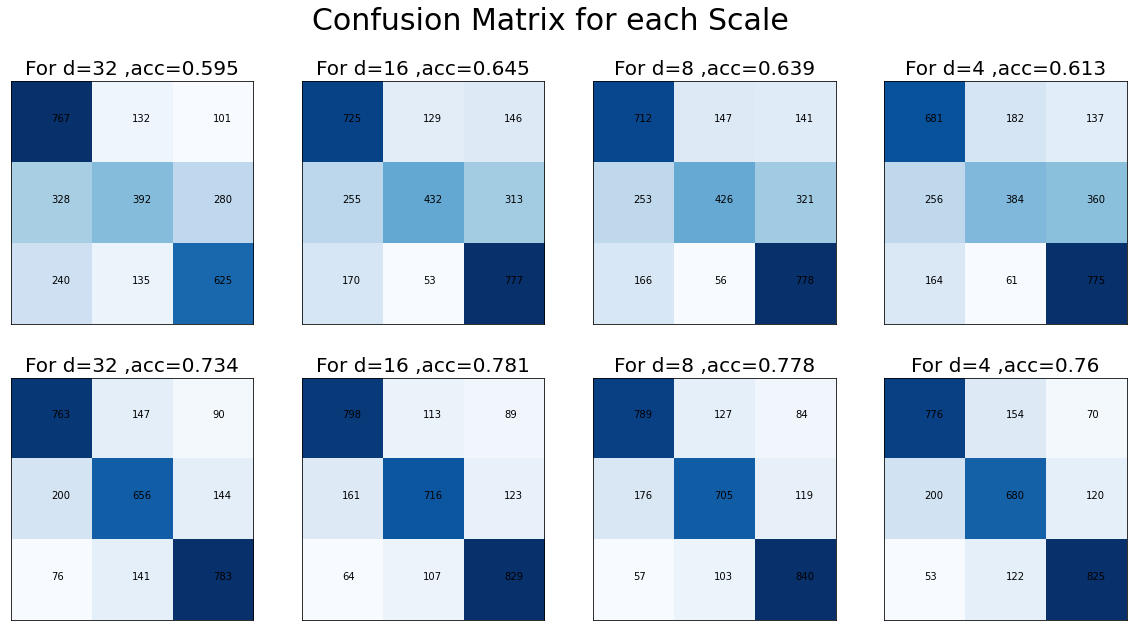

In [76]:
dims = [32,16,8,4,32,16,8,4]
fig, axs = plt.subplots(2, 4,figsize=(20,10))
fig.suptitle("Confusion Matrix for each Scale",fontsize=30)
for pi in range(0,axs.shape[0]):
    for pj in range(0,axs.shape[1]):
        index = np.round(pi*4+pj)
        cm = confusion_matrices[index]
        axs[pi,pj].matshow(cm,cmap="Blues")
        axs[pi,pj].set_title("For d="+str(dims[index])+" ,acc="+str(np.round(np.diag(cm).sum()/3000,3)),fontsize=20)
        for i in range(0,cm.shape[0]):
            for j in range(0,cm.shape[1]):
                axs[pi,pj].set_xticks([])
                axs[pi,pj].set_yticks([])
                axs[pi,pj].annotate(cm[i,j],(j,i))

Text(0.5, 1.0, 'NB VS GM')

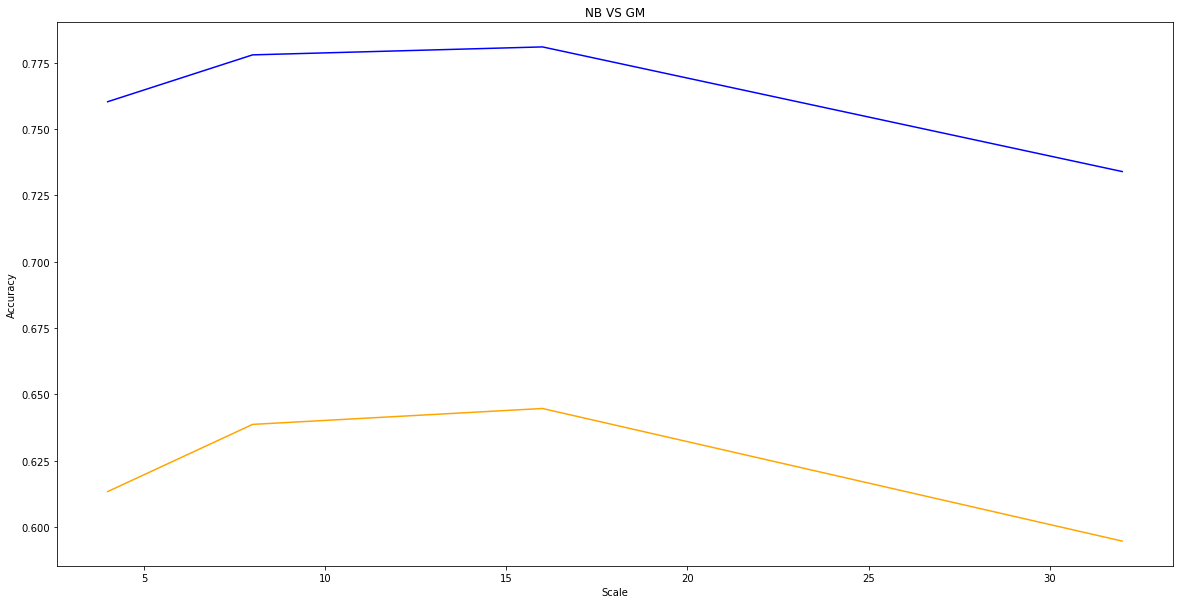

In [77]:
plt.figure(figsize=(20,10))
plt.plot(dims[:4],[np.diag(cm).sum()/3000 for cm in confusion_matrices_nb],color='orange')
plt.plot(dims[:4],[np.diag(cm).sum()/3000 for cm in confusion_matrices_gm],color='blue')
plt.xlabel('Scale')
plt.ylabel('Accuracy')
plt.title('NB VS GM')

<hr style="border:2px solid black"> </hr>

## Comment on the results ##

### 
-The first observation is that the gussian generative model is better than the naive bias model because the naive model assumes that all the atributes are independant and that is not the case.
-The second observation is that when the size is very small the accuricy decreses because alot of important details is gone.
###